Постройте графики для приведенных наборов данных. Найдите коэффициенты для линии
регрессии и коэффициенты детерминации. Что вы замечаете? Нанесите на график модель
линейной регрессии.

X1= np.array([30,30,40, 40)]

Y1= np.array([37, 47, 50, 60)]


x2= np.array([30,30,40, 40, 20, 20, 50, 50])

y2= np.array([37, 47, 50, 60, 25, 35, 62, 72])


X3 = np.array([30,30,40, 40, 20, 20, 50, 50, 10, 10, 60, 60])

Y3 = np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84])


In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Первый массив

In [17]:
X1= np.array([30,30,40, 40])
Y1= np.array([37, 47, 50, 60])

<function matplotlib.pyplot.show(close=None, block=None)>

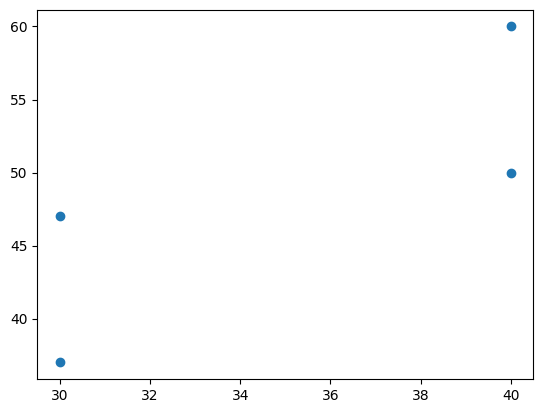

In [18]:
plt.scatter(X1,Y1)
plt.show

In [19]:
R=np.corrcoef(X1,Y1)[0,1]**2 
R

0.6282527881040891

Метод первый: математические формулы

In [20]:
b1=(np.mean(X1*Y1)-np.mean(X1)*np.mean(Y1))/(np.mean(X1**2)-np.mean(X1)**2)
b1

1.3

In [21]:
b0 = np.mean(Y1) - b1*np.mean(X1)
b0

3.0

<function matplotlib.pyplot.show(close=None, block=None)>

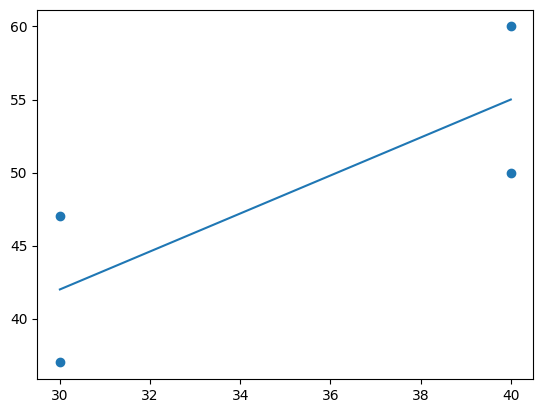

In [22]:
plt.scatter(X1,Y1)
plt.plot(X1, X1*b1 + b0)
plt.show

Метод второй: матричный

In [23]:
X=X1.reshape((len(X1),1))
Y=Y1.reshape((len(Y1),1))

In [24]:
X=np.hstack([np.ones((len(X1),1)),X])
X

array([[ 1., 30.],
       [ 1., 30.],
       [ 1., 40.],
       [ 1., 40.]])

In [25]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ Y)
B

array([[3. ],
       [1.3]])

### Второй массив

In [26]:
X2= np.array([30,30,40, 40, 20, 20, 50, 50])
Y2= np.array([37, 47, 50, 60, 25, 35, 62, 72])

In [28]:
R=np.corrcoef(X2,Y2)[0,1]**2
R

0.8846950517836595

Метод первый: математические формулы

In [29]:
b1=(np.mean(X2*Y2)-np.mean(X2)*np.mean(Y2))/(np.mean(X2**2)-np.mean(X2)**2)
b1

1.24

In [30]:
b0 = np.mean(Y2) - b1*np.mean(X2)
b0

5.100000000000001

<function matplotlib.pyplot.show(close=None, block=None)>

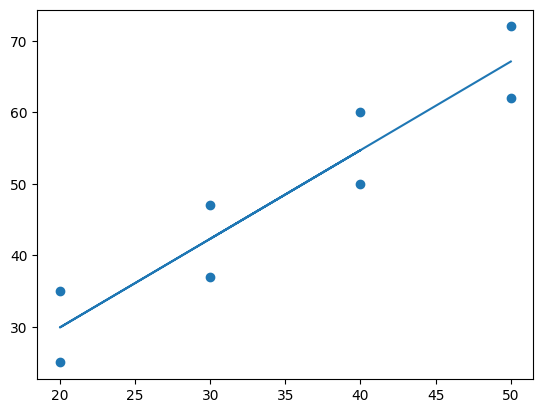

In [31]:
plt.scatter(X2,Y2)
plt.plot(X2, X2*b1 + b0)
plt.show

Метод второй: матричный

In [32]:
X=X2.reshape((len(X2),1))
Y=Y2.reshape((len(Y2),1))

In [33]:
X=np.hstack([np.ones((len(X2),1)),X])
X

array([[ 1., 30.],
       [ 1., 30.],
       [ 1., 40.],
       [ 1., 40.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 50.],
       [ 1., 50.]])

In [34]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ Y)
B

array([[5.1 ],
       [1.24]])

### Третий массив

In [15]:
X3 = np.array([30,30,40, 40, 20, 20, 50, 50, 10, 10, 60, 60])
Y3 = np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84])

<function matplotlib.pyplot.show(close=None, block=None)>

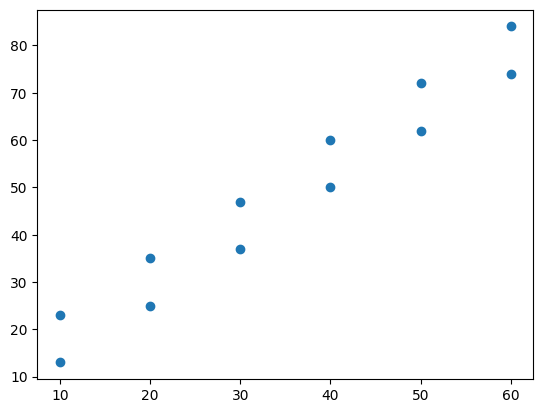

In [15]:
plt.scatter(X3,Y3)
plt.show

In [14]:
r=np.corrcoef(X3,Y3)[0,1]
r

0.9725791007224713

Метод первый: математические формулы

In [35]:
b1=(np.mean(X3*Y3)-np.mean(X3)*np.mean(Y3))/(np.mean(X3**2)-np.mean(X3)**2)
b1

1.2257142857142853

In [36]:
b0 = np.mean(Y3) - b1*np.mean(X3)
b0

5.600000000000016

<function matplotlib.pyplot.show(close=None, block=None)>

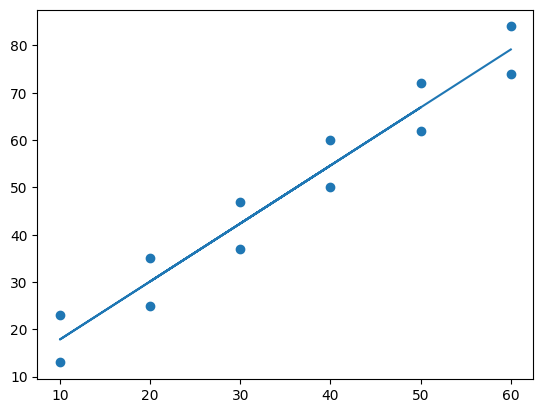

In [37]:
plt.scatter(X3,Y3)
plt.plot(X3, X3*b1 + b0)
plt.show

Метод второй: матричный

In [38]:
X=X3.reshape((len(X3),1))
Y=Y3.reshape((len(Y3),1))

In [39]:
X=np.hstack([np.ones((len(X3),1)),X])
X

array([[ 1., 30.],
       [ 1., 30.],
       [ 1., 40.],
       [ 1., 40.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 50.],
       [ 1., 50.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 60.],
       [ 1., 60.]])

In [40]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ Y)
B

array([[5.6       ],
       [1.22571429]])

Метод третий: градиентный спуск

In [43]:
def mse_(B0, B1, X3, Y3, n):
  return np.sum((B0+B1*X3-Y3)**2)/n

In [44]:
B1=0.1
B0=100
alpha = 1e-4
n=len(X3)
for i in range (10**6+1):
  B1 -=alpha*2/n *np.sum((B0+B1 *X3 -Y3)*X3)
  B0 -=alpha*2/n *np.sum((B0+B1 *X3 -Y3))
  if i%100000 ==0:
    print(B1, B0)

-0.21933333333333335 99.99123533333334
1.1791198079860086 7.6188381162374865
1.2247175993419468 5.643184268533845
1.225692965940501 5.600923739765843
1.225713829670372 5.600019759398122
1.2257142759592081 5.600000422666445
1.2257142855056178 5.6000000090411195
1.2257142857098209 5.600000000193452
1.2257142857140175 5.600000000011605
1.2257142857140175 5.600000000011605
1.2257142857140175 5.600000000011605


Те же методы на примере задачи из предыдущего семинара

In [46]:
x = np.array([10,8, 13, 9,11,14, 6,4,12, 7,5])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68 ])

In [47]:
R=np.corrcoef(x,y)**2
R

array([[1.        , 0.66654246],
       [0.66654246, 1.        ]])

In [48]:
X=x.reshape((len(x),1))
Y=y.reshape((len(y),1))

In [49]:
X=np.hstack([np.ones((len(x),1)),X])
X

array([[ 1., 10.],
       [ 1.,  8.],
       [ 1., 13.],
       [ 1.,  9.],
       [ 1., 11.],
       [ 1., 14.],
       [ 1.,  6.],
       [ 1.,  4.],
       [ 1., 12.],
       [ 1.,  7.],
       [ 1.,  5.]])

In [50]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ Y)
B

array([[3.00009091],
       [0.50009091]])

<function matplotlib.pyplot.show(close=None, block=None)>

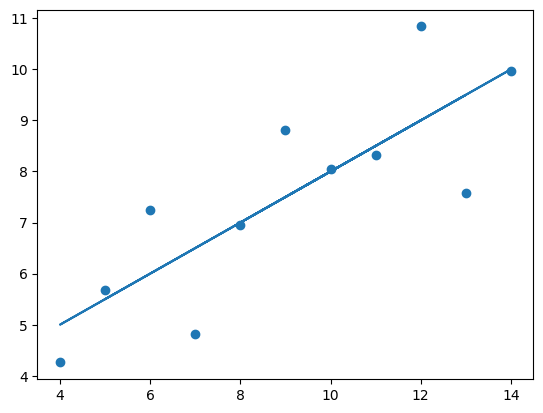

In [56]:
plt.scatter(x,y)
plt.plot(x, x*B[1] + B[0])
plt.show

In [59]:
y_pred = B[0] + B[1] * x
resid = y - y_pred
from scipy import stats
stats.shapiro(resid)  #p-value > 5%, это тест на нормальное распределение, поэтому делаем вывод, что распределение нормальное

ShapiroResult(statistic=0.9421076774597168, pvalue=0.5455849170684814)

In [60]:
df1=2-1
df2=(len(x)-2)

In [65]:
f_table=stats.f.ppf(0.95, df1, df2)
f_table  #табличное значение по фишеру

5.117355029199227

In [66]:
MSF = np.sum((y_pred - np.mean(y))**2)/df1
MSO = np.sum(resid**2)/df2
f=MSF/MSO
f # наблюдаемое значение

17.989942967676996

Так как наблюдаемое значение выше табличного, находимся в альтернативной гипотезе, таким образом уравнение статистически значимо